In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('data_assignment.csv')

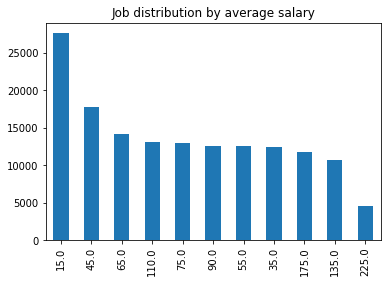

In [5]:
# Get the salary ranges using "AverageSalary", the total jobs of each range and display them in the bar chart
df['AverageSalary'] = df[['LowestSalary', 'HighestSalary']].mean(axis=1)
job_counts = df['AverageSalary'].value_counts()
plt.title('Job distribution by average salary')
job_counts.plot(kind='bar')


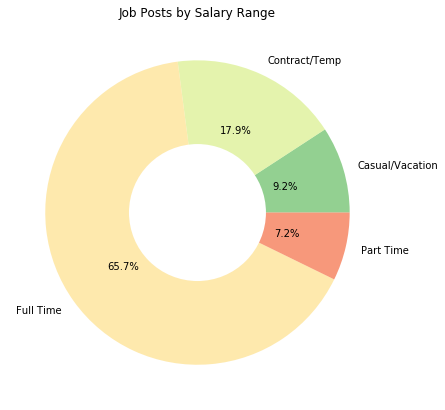

In [8]:
# Display the list of job types and the number of jobs of each type using pie chart. (1 point)
#create dataframe for salary ranges
df_jobtype = df[df['JobType'].isna()==False]
df_jobtype = df_jobtype.groupby(['JobType']).count()
df_jobtype['Label'] = df_jobtype.index
df_jobtype['Count'] = df_jobtype["Id"]

#salary ranges plot
fig, ax = plt.subplots(figsize=(7,7))
ax.pie(df_jobtype['Count'], colors=sns.color_palette("RdYlGn_r", len(df_jobtype)),labels=df_jobtype['Label'],wedgeprops={'alpha':0.7},autopct='%.1f%%')
ax.set_title('Job Posts by Salary Range', loc='center')

# add centre circle to make it a donut
centre_circle2 = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax.add_patch(centre_circle2)

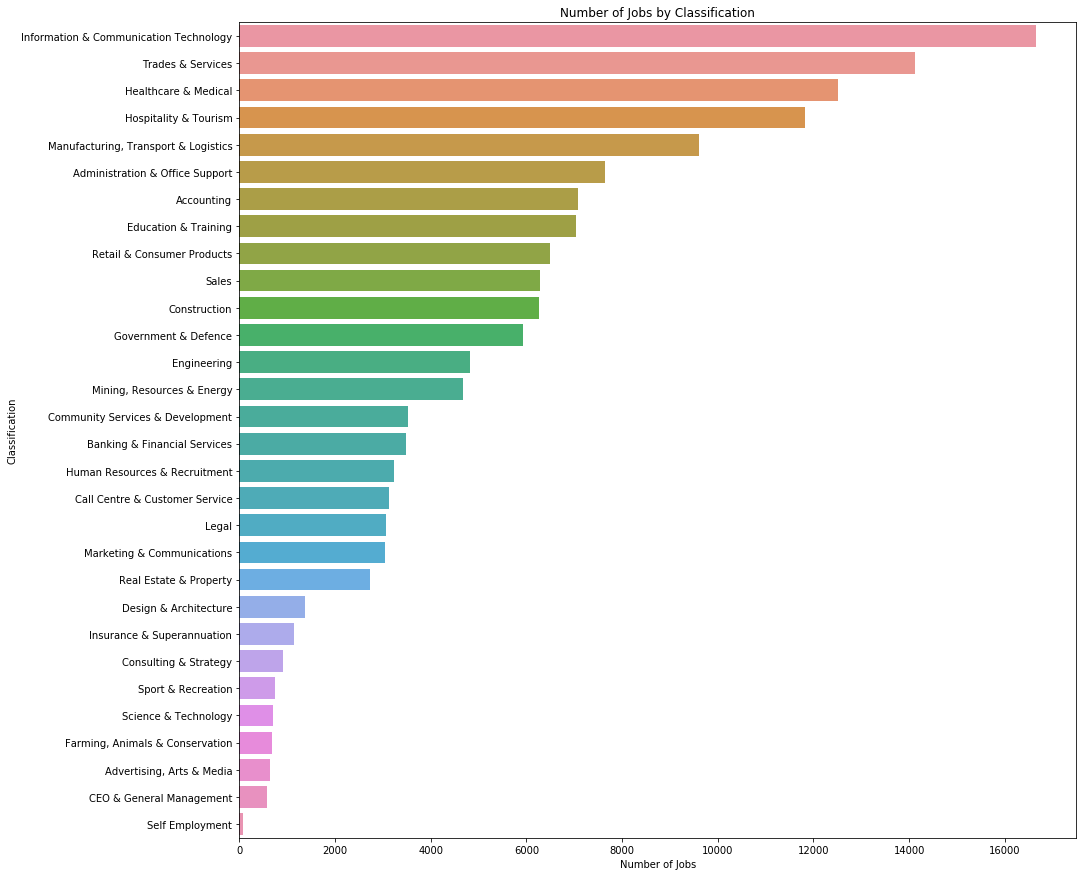

In [9]:
plt.figure(figsize=(15,15))
sns.countplot(y='Classification',data=df,order=df.Classification.value_counts().index)
plt.title('Number of Jobs by Classification')
plt.xlabel('Number of Jobs')
plt.show()

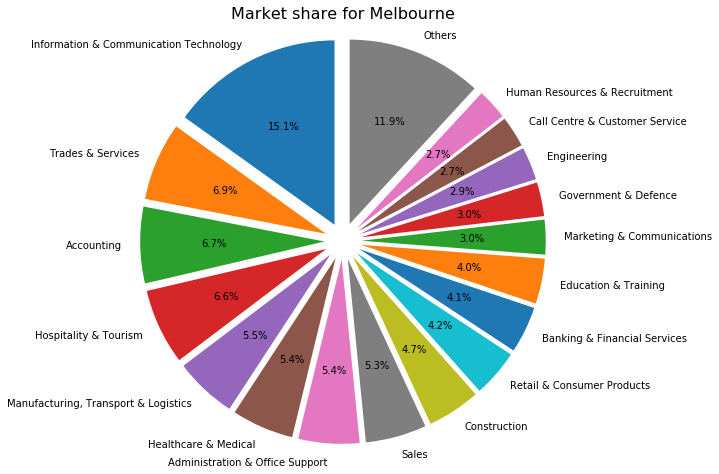

In [10]:
#sizes
fig1, ax1 = plt.subplots(figsize=(8, 8))

# "explode" the 2nd slice (i.e. 'Hogs')
explode = [0.1] * 18

locationDf = df[(df['Location'].isna()==False) & (df['Location'] == "Sydney")]
locationDf = locationDf.groupby('Classification').count()
locationDf['Classification'] = locationDf.index
locationDf['Count'] = locationDf["Id"]

# Pie char for job market share of cities
from matplotlib import cm
locationDf = locationDf.sort_values(by=["Count"], ascending =False)

# Get the top 17 locations
locationTop18Df = locationDf[:17].copy()

# others 
new_row = pd.DataFrame(data = {
    'Classification' : ['Others'],
    'Count' : [locationDf["Count"][17:].sum()]
})

# Add 17 top locations with others
locationTop18Df = pd.concat([locationTop18Df, new_row],sort=False)
locationTop18Df.index = locationTop18Df['Classification']

# Pie chart
plt.pie( locationTop18Df["Count"], labels=locationTop18Df["Classification"], autopct='%1.1f%%', startangle=90, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Market share for Melbourne',size=16,loc='center')
plt.ylabel('')
plt.show()

Text(3.6750000000000043, 0.5, 'Highest Salary')

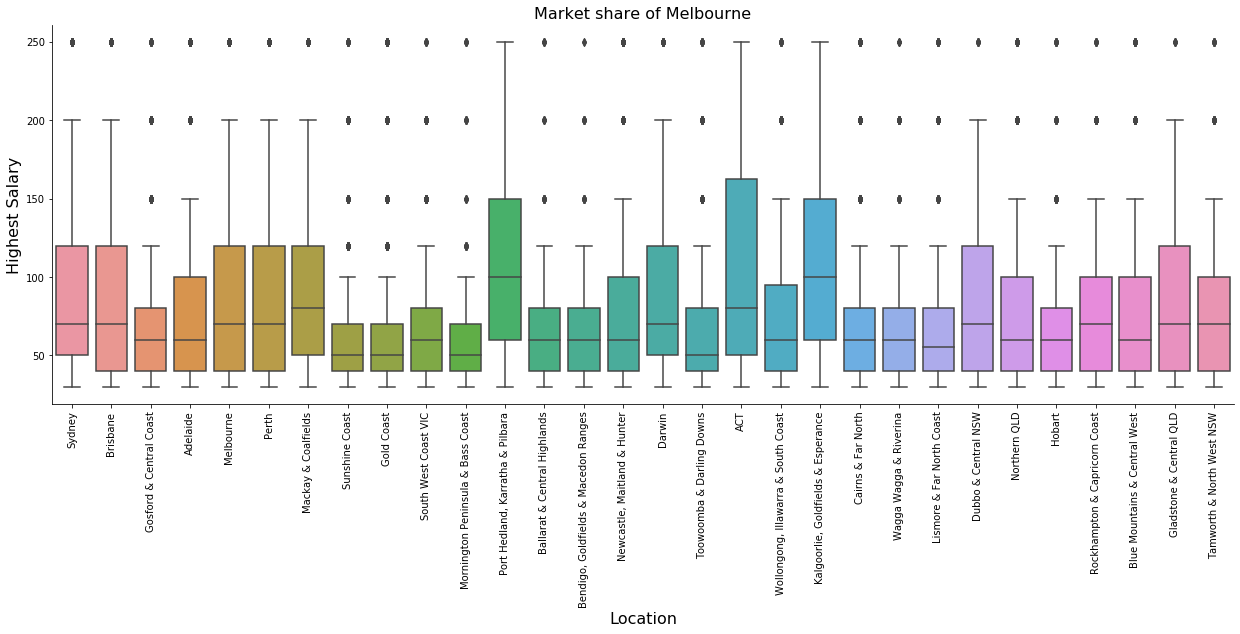

In [11]:
# Get the top 30 cities who have the most number of job postings
locationDf2 = df[df['Location'].isna()==False]
locationDf2 = locationDf2.groupby('Location').count()
locationDf2['Location'] = locationDf2.index
locationDf2['Count'] = locationDf2["Id"]
locationDf2 = locationDf2.sort_values(by=["Count"], ascending =False)
locationTop30Df = locationDf2[:30].copy()


df_top30 = df[(df['Location'].isna()==False) & (df['Location'].isin(locationTop30Df['Location']).astype(int))]

ax = sns.catplot(x="Location", y="HighestSalary", data = df_top30, kind="box", height=6, aspect=3)
ax.set_xticklabels(rotation=90)
plt.title('Market share of Melbourne',size=16,loc='center')
plt.xlabel('Location',size=16)
plt.ylabel('Highest Salary',size=16)
